En este ejercicio vas a trabajar con un clasificador binario. Para ello utilizarás el dataset usuarios_win_mac_lin.csv. Encontrarás datos de navegación de usuarios dentro de una web (paginas, duración...) y tendrás que predecir desde qué sistema operativo viene el usuario (clase 0, 1, 2)

Realiza de nuevo el ejercicio con eliminando la clase 1 del dataframe y entrena un clasificador binario. ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('data/usuarios_win_mac_lin.csv')
df.shape

(170, 5)

In [3]:
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


# Limpieza de datos

In [4]:
df.rename(columns={'clase': 'target'}, inplace=True)
df.target.unique()

array([2, 1, 0], dtype=int64)

In [5]:
df.target.value_counts(normalize=True)

0    0.505882
2    0.258824
1    0.235294
Name: target, dtype: float64

# Dividimos el dataset

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42, stratify=y)

y_test.value_counts(normalize=True)

0    0.511628
2    0.255814
1    0.232558
Name: target, dtype: float64

In [7]:
X_train.shape, X_test.shape

((127, 4), (43, 4))

In [8]:
X_train.index

Int64Index([151,  60, 137, 157,  34, 146, 152,  11,  62, 117,
            ...
             54, 159, 123,  90, 121,  19,  40,   3,   6, 108],
           dtype='int64', length=127)

In [9]:
model = LogisticRegression(penalty='none', max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, penalty='none')

## Matriz de correlación

In [10]:
dftrain = df.loc[X_train.index]
dftrain

,duracion,paginas,acciones,valor,target
151,11.0,1,3,6,0
60,85.0,2,2,6,0
137,12.0,1,7,42,0
157,11.0,1,5,15,0
34,848.0,3,18,54,1
...,...,...,...,...,...
19,49.0,2,8,32,1
40,11.0,2,10,40,1
3,101.0,3,6,12,2
6,133.0,2,2,4,2


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

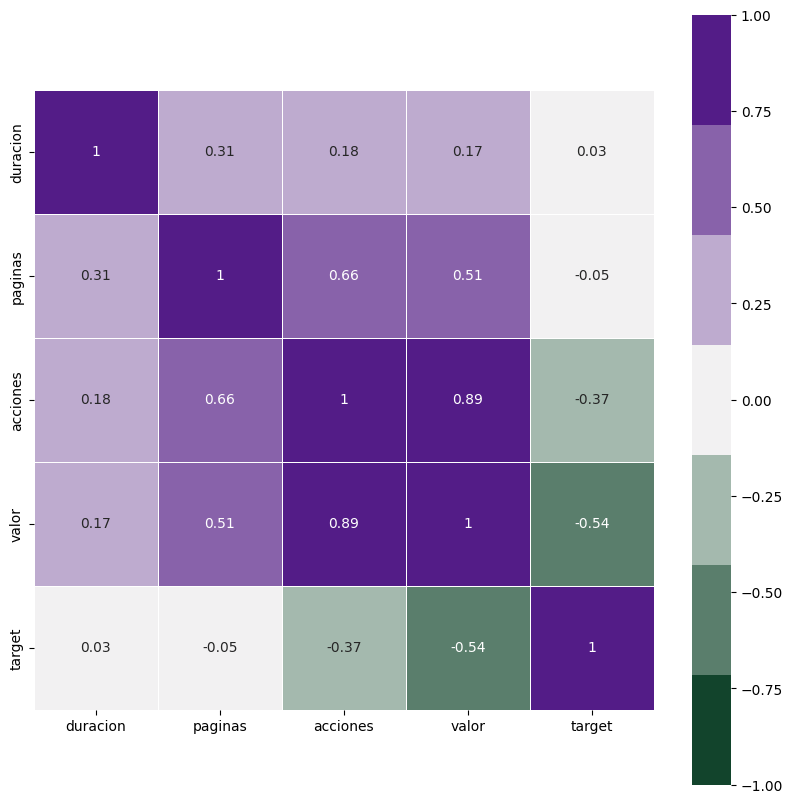

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(dftrain.corr(method='spearman'),2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145,280,s=85,l=25,n=7),
            square=True,
            linewidths=0.5
           );

In [13]:
# Correlaciones con el target
corr = np.abs(dftrain.corr(method='pearson')['target']).sort_values(ascending=False)
corr

target      1.000000
acciones    0.355188
valor       0.337306
duracion    0.075854
paginas     0.075625
Name: target, dtype: float64

In [14]:
corr = np.abs(dftrain.corr(method='spearman')['target']).sort_values(ascending=False)
corr

target      1.000000
valor       0.537612
acciones    0.370707
paginas     0.051233
duracion    0.033386
Name: target, dtype: float64

# Modelo

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

C:\Users\Victor\anaconda3\envs\general\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
print(log_reg.coef_)
print(log_reg.intercept_)
print(log_reg.classes_)

[[-0.00478564 -0.20939459 -0.66538469  0.45441425]
 [-0.00254029 -0.09327659 -0.99093027  0.49928137]
 [ 0.00732592  0.30267118  1.65631496 -0.95369562]]
[-0.74737275 -0.80729023  1.55466299]
[0 1 2]


In [17]:
coef_df = pd.DataFrame(log_reg.coef_[0], X_train.columns,
                      columns=['Coefficient'])
coef_df

,Coefficient
duracion,-0.004786
paginas,-0.209395
acciones,-0.665385
valor,0.454414


## Desempeño del modelo

In [18]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(log_reg.predict(X_train), y_train)
acc_test = accuracy_score(log_reg.predict(X_test), y_test)

print('Accuracy train:', acc_train)
print('Accuracy test:', acc_test)

Accuracy train: 0.7795275590551181
Accuracy test: 0.7906976744186046


In [19]:
from sklearn.metrics import classification_report
target_names = ['Navegador 0', 'Navegador 1','Navegador 2']

print('TRAIN')
print('-------------------')
print(classification_report(y_train,log_reg.predict(X_train),
                           target_names=target_names))

TRAIN
-------------------
              precision    recall  f1-score   support

 Navegador 0       0.74      0.88      0.80        64
 Navegador 1       0.67      0.33      0.44        30
 Navegador 2       0.92      1.00      0.96        33

    accuracy                           0.78       127
   macro avg       0.77      0.74      0.73       127
weighted avg       0.77      0.78      0.76       127



In [20]:
print('TEST')
print('-------------------')
print(classification_report(y_test,log_reg.predict(X_test),
                           target_names=target_names))

TEST
-------------------
              precision    recall  f1-score   support

 Navegador 0       0.81      0.77      0.79        22
 Navegador 1       1.00      0.60      0.75        10
 Navegador 2       0.69      1.00      0.81        11

    accuracy                           0.79        43
   macro avg       0.83      0.79      0.79        43
weighted avg       0.82      0.79      0.79        43



In [21]:
!pip install yellowbrick

C:\Users\Victor\anaconda3\envs\general\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


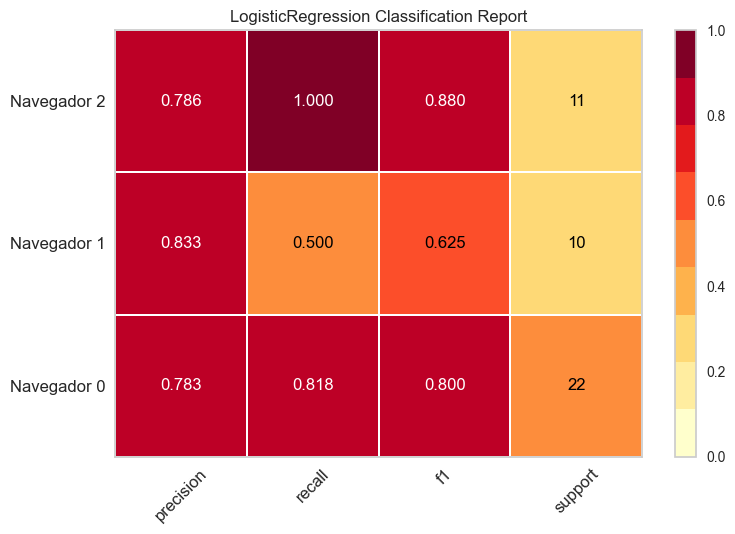

<AxesSubplot: title={'center': 'LogisticRegression Classification Report'}>

In [22]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(LogisticRegression(penalty='none'),
                                 classes=target_names,support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# Repito el ejercicio eliminando la clase 1

In [23]:
df.index[df.target==1]

Int64Index([ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
             30,  31,  32,  33,  34,  40,  41,  42,  43,  44,  45,  46,  47,
             48,  96,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
            109],
           dtype='int64')

In [24]:
df2 = df.drop(df.index[df.target==1],axis=0)

In [25]:
df2

,duracion,paginas,acciones,valor,target
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [26]:
df2.target.value_counts(normalize=True)

0    0.661538
2    0.338462
Name: target, dtype: float64

# Dividimos el dataset

In [27]:
from sklearn.model_selection import train_test_split

X = df2.drop(['target'], axis=1)
y = df2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42, stratify=y)

y_test.value_counts(normalize=True)

0    0.666667
2    0.333333
Name: target, dtype: float64

In [28]:
X_train.shape, X_test.shape

((97, 4), (33, 4))

In [29]:
X_train.index

Int64Index([151,  95,  59, 167,   2,  91,  13, 119,  60, 162, 134, 150, 166,
            149,  94,  66, 153,  11,  87, 127, 120, 138,  15, 161,  16,   1,
             79,  38,  76,  83, 113, 116,  82, 152,  49, 148,  55,  57, 111,
            112,  77, 169, 133, 121, 115,  67, 117,  12,  10,  74, 123, 128,
             36,  65,  68,  58,   3,  92, 168, 145,  84, 156,  75,  73, 118,
              5, 140, 130,  90,  52, 124,  35,  88,  64, 125,  93, 137,  56,
             80,  62,   9,  89,  71,  85, 142, 139,  37, 131, 146,  39,  53,
             54, 157,   4,  61, 159, 154],
           dtype='int64')

## Matriz de correlación

In [30]:
df2train = df2.loc[X_train.index]
df2train

,duracion,paginas,acciones,valor,target
151,11.0,1,3,6,0
95,12.0,1,3,6,2
59,68.0,9,63,378,0
167,13.0,1,3,9,0
2,57.0,2,4,4,2
...,...,...,...,...,...
157,11.0,1,5,15,0
4,109.0,2,6,12,2
61,86.0,3,27,162,0
159,13.0,1,4,24,0


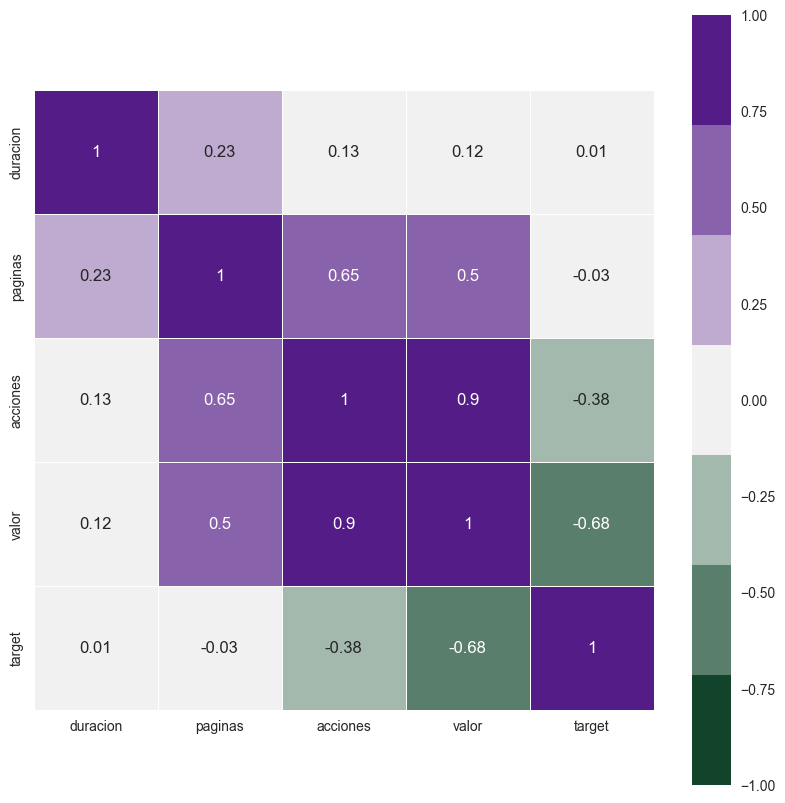

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df2train.corr(method='spearman'),2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145,280,s=85,l=25,n=7),
            square=True,
            linewidths=0.5
           );

In [32]:
# Correlaciones con el target
corr = np.abs(df2train.corr(method='pearson')['target']).sort_values(ascending=False)
corr

target      1.000000
valor       0.371739
acciones    0.338131
duracion    0.116196
paginas     0.035055
Name: target, dtype: float64

In [33]:
corr = np.abs(df2train.corr(method='spearman')['target']).sort_values(ascending=False)
corr

target      1.000000
valor       0.683120
acciones    0.381333
paginas     0.029643
duracion    0.008211
Name: target, dtype: float64

# Modelo

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [35]:
print(log_reg.coef_)
print(log_reg.intercept_)
print(log_reg.classes_)

[[ 0.00913495  0.430617    2.00273729 -1.19614925]]
[1.55612698]
[0 2]


In [36]:
coef_df = pd.DataFrame(log_reg.coef_[0], X_train.columns,
                      columns=['Coefficient'])
coef_df

,Coefficient
duracion,0.009135
paginas,0.430617
acciones,2.002737
valor,-1.196149


## Desempeño del modelo

In [37]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(log_reg.predict(X_train), y_train)
acc_test = accuracy_score(log_reg.predict(X_test), y_test)

print('Accuracy train:', acc_train)
print('Accuracy test:', acc_test)

Accuracy train: 0.9690721649484536
Accuracy test: 0.8484848484848485


In [38]:
from sklearn.metrics import classification_report
target_names = ['Navegador 0', 'Navegador 2']

print('TRAIN')
print('-------------------')
print(classification_report(y_train,log_reg.predict(X_train),
                           target_names=target_names))

TRAIN
-------------------
              precision    recall  f1-score   support

 Navegador 0       1.00      0.95      0.98        64
 Navegador 2       0.92      1.00      0.96        33

    accuracy                           0.97        97
   macro avg       0.96      0.98      0.97        97
weighted avg       0.97      0.97      0.97        97



In [39]:
print('TEST')
print('-------------------')
print(classification_report(y_test,log_reg.predict(X_test),
                           target_names=target_names))

TEST
-------------------
              precision    recall  f1-score   support

 Navegador 0       1.00      0.77      0.87        22
 Navegador 2       0.69      1.00      0.81        11

    accuracy                           0.85        33
   macro avg       0.84      0.89      0.84        33
weighted avg       0.90      0.85      0.85        33



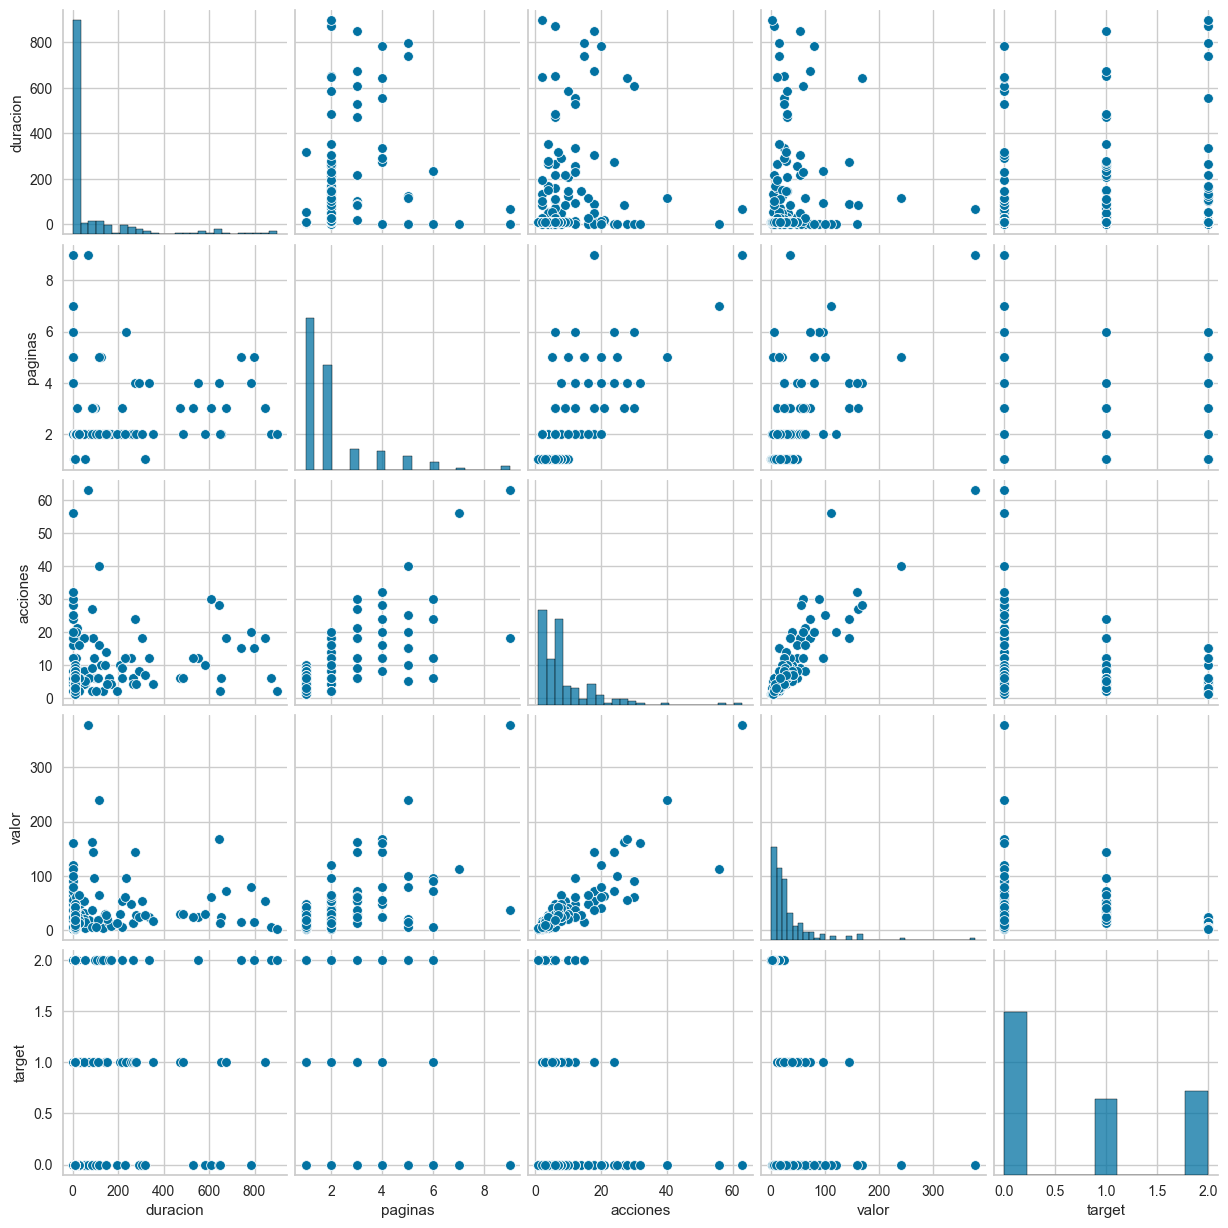

In [40]:
sns.pairplot(df)

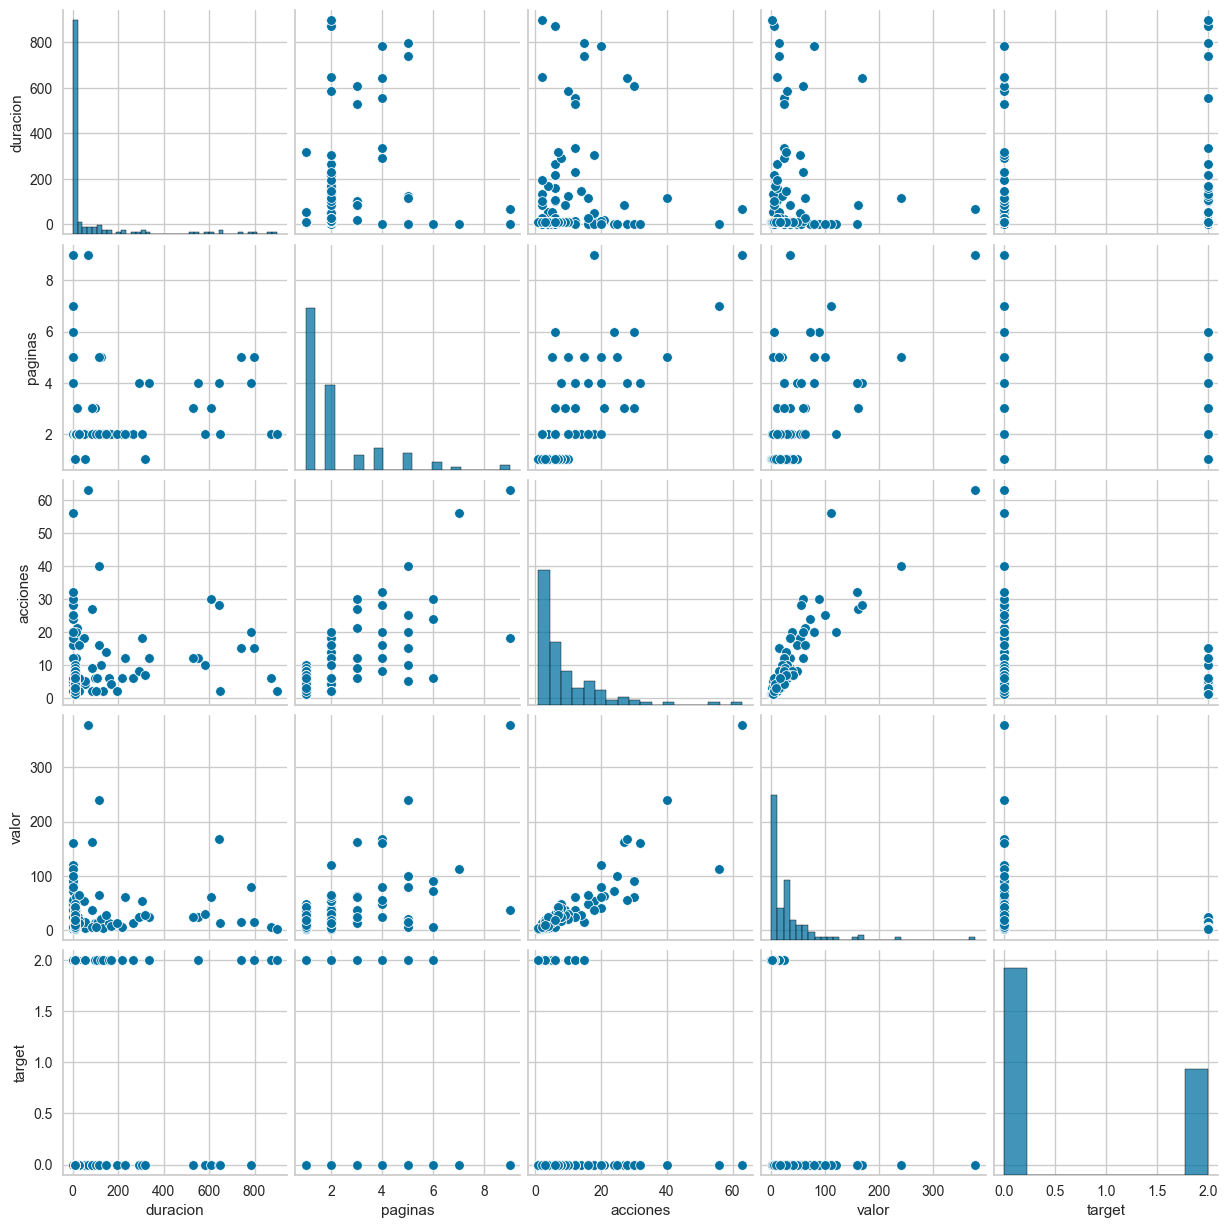

In [41]:
sns.pairplot(df2)

In [42]:
# Como las variables no tienen una distribución normal, es preferible utlizar mix-max escaler

In [43]:
from sklearn.preprocessing  import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [45]:
X_scaled = scaler.transform(X_train)

In [46]:
pd.DataFrame(X_scaled,columns=X_train.columns)

,duracion,paginas,acciones,valor
0,0.011148,0.000,0.032258,0.013263
1,0.012263,0.000,0.032258,0.013263
2,0.074693,1.000,1.000000,1.000000
3,0.013378,0.000,0.032258,0.021220
4,0.062430,0.125,0.048387,0.007958
...,...,...,...,...
92,0.011148,0.000,0.064516,0.037135
93,0.120401,0.125,0.080645,0.029178
94,0.094760,0.250,0.419355,0.427056
95,0.013378,0.000,0.048387,0.061008


In [47]:
model = LogisticRegression(penalty='l2', C=2)
model.fit(X_train,y_train)

LogisticRegression(C=2)

In [48]:
y_pred = model.predict(scaler.transform(X_test))

C:\Users\Victor\anaconda3\envs\general\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [49]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [50]:
# Accuracy
model.score(scaler.transform(X_test),y_test)

C:\Users\Victor\anaconda3\envs\general\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.3333333333333333

In [ ]:
# Utilizando GridSearchCV

from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l2','none'],
    'C': np.arange(1,10,1),
    'solver': ['newton-cg','lbfgs','liblinear', 'sag', 'saga'],
    'max_iter': [100,1000,10000]
}

model = LogisticRegression()

grid_search = GridSearchCV(model, # El modelo que quiero entrenar
                                  param_grid, # El grid de parametros
                                  cv=5, # Folds del Cross Validation (La CV de RandomizedSearchCV)
                                  scoring='f1', # Metrica que quiero optimizar (acc = accuracy)
                                  n_jobs = -1 # Paralelizar
                                  )

grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_